In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [68]:
tweets = pd.read_csv("train.csv")
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [72]:
# tweets["location"] == tweets["location"] devuelve false si es un NaN

tweets["located"] = tweets["location"] == tweets["location"]
tweets.loc[tweets["located"],"located"] = 1
tweets.loc[tweets["located"] == False ,"located"] = 0
tweets.head(100)

,id,keyword,location,text,target,located
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
...,...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0,1
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0,1


In [74]:
grouped = tweets.groupby(["target","located"]).agg({"target":["count"]})
grouped.columns = ["count"]
grouped.head()

count
target located       
0      0         1458
       1         2884
1      0         1075
       1         2196

In [75]:
grouped2 = grouped.reset_index()
grouped2["count"] /= len(tweets)
grouped2.head()

,target,located,count
0,0,0,0.191515
1,0,1,0.378826
2,1,0,0.141206
3,1,1,0.288454


In [76]:
pivoted= grouped2.pivot("target","located")
pivoted

count          
located         0         1
target                     
0        0.191515  0.378826
1        0.141206  0.288454

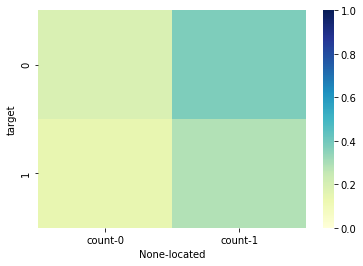

In [77]:
sns.heatmap(pivoted,vmin=0, vmax=1,cmap="YlGnBu")